In [416]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [417]:
car=pd.read_csv(r'quikr_car.csv')

In [418]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [419]:
car.shape

(892, 6)

In [420]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [421]:
# create backup copy
backup=car.copy()

In [422]:
car.columns = car.columns.str.strip()        # remove leading/trailing spaces
#car.columns = car.columns.str.lower()        # make all lowercase


##  Quality
- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentioned tata sumo'
- company : many of the names aare not of any company like 'used ', URJENT' AND SO ON
- year has many non -yearly values
- year is in object datatype change to interger 
- price has Ask for price
- price hase commas in it s price and is in object
- kms_driven has object values with kms a last
- it has nan values and two rows havw the 'Petrol' in them
- fuel_type has nan values 

## cleaning the data
#### year has namy non year values 


In [423]:
car=car[car['year'].str.isnumeric()]

#### year is in object form make it in int

In [424]:
car = car[car['year'].str.match(r'^\d{4}$', na=False)]  # Keep only 4-digit numbers
car = car[pd.to_numeric(car['year'], errors='coerce').notnull()]


In [425]:
car['year']=car['year'].astype('int')

##### price has ask for values

In [426]:
print(car.columns.tolist())


['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type']


In [427]:
car=car[car['Price']!='Ask For Price']

In [428]:
car.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

#### price hase commas in its prices and is in object

In [429]:
car['Price']=car['Price'].str.replace(',','').astype('int')

##### kms_driven has object type values with kms at last

In [430]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

##### it has nan valeus and two rows have 'Ptreol' in tehm

In [431]:
car=car[car['kms_driven'].str.isnumeric()]


In [432]:
car['kms_driven']=car['kms_driven'].astype('int')

##### fuel_type has nan values

In [433]:
car=car[~car['fuel_type'].isna()]

In [434]:
car.shape

(816, 6)

## name and company had spammed data __ by but with the previous cleaning those rows got removed


#### company  does not need  any cleaning now . changing car names . keeping the only first three words

In [435]:

car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [436]:
car=car.reset_index(drop=True)

## cleaned data

In [437]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [438]:
car.to_csv("cleaned_car_data.csv")

In [439]:
car.describe(include='all') ## we can see that price hase outliers

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [440]:
car=car[car['Price']<6000000]

In [441]:
car.describe()

,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.442945,4.017933e+05,46277.096933
std,4.005079,3.815888e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56879.000000
max,2019.000000,3.100000e+06,400000.000000


## cahecking relationship of campany with price

In [442]:

car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [443]:
import seaborn as sns

C:\Users\wwwan\AppData\Local\Temp\ipykernel_23228\2788130517.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


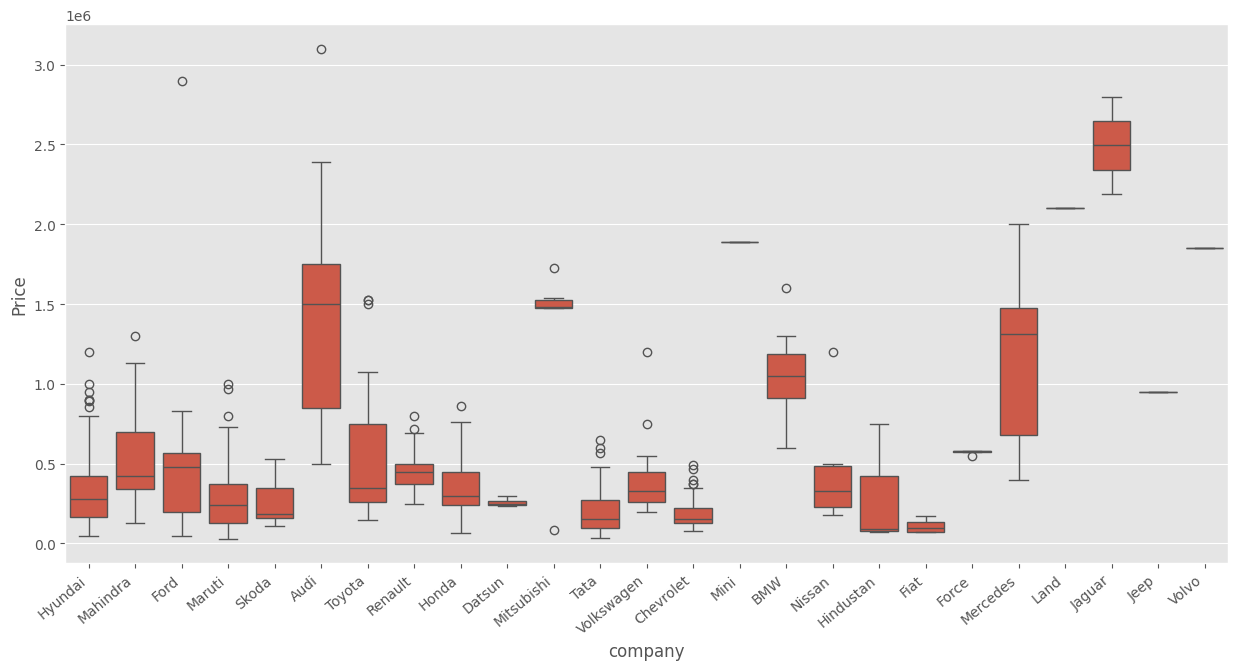

In [444]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

## checking relationship of the year with price

In [445]:
car.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

C:\Users\wwwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wwwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wwwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wwwan\AppData\Local\Packages\Py

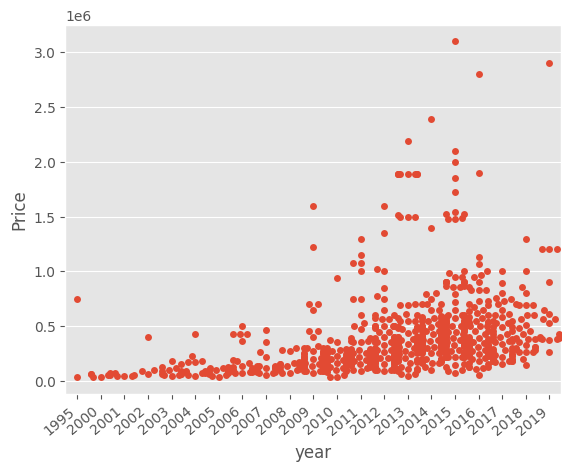

In [446]:
plt.Figure(figsize=(15,7))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

## checking the relationship of the kms_driven with price

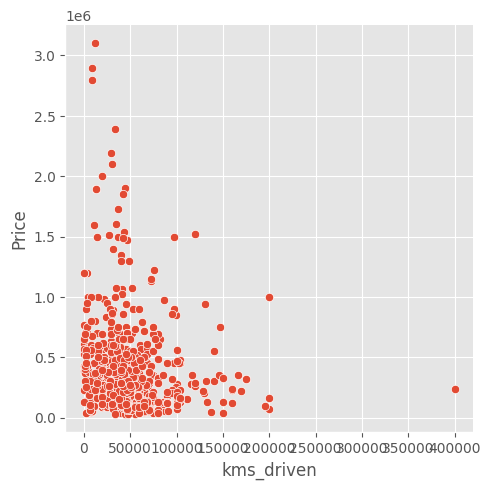

In [447]:
plt.Figure(figsize=(15,7))
ax=sns.relplot(x='kms_driven',y='Price',data=car)


## checking relationship of fuel type with price

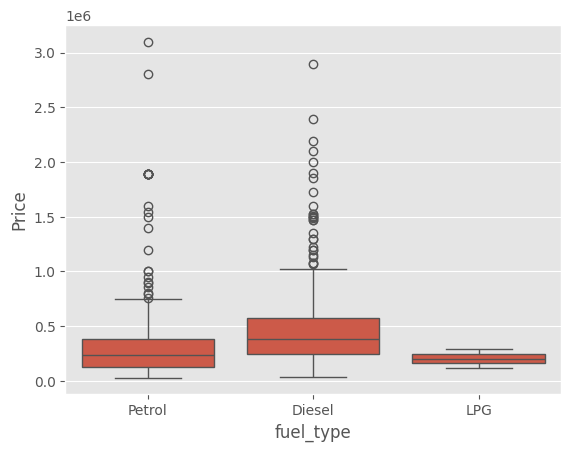

In [448]:
plt.Figure(figsize=(17,7))
ax=sns.boxplot(x='fuel_type',y='Price',data=car)

<Axes: xlabel='year', ylabel='fuel_type'>

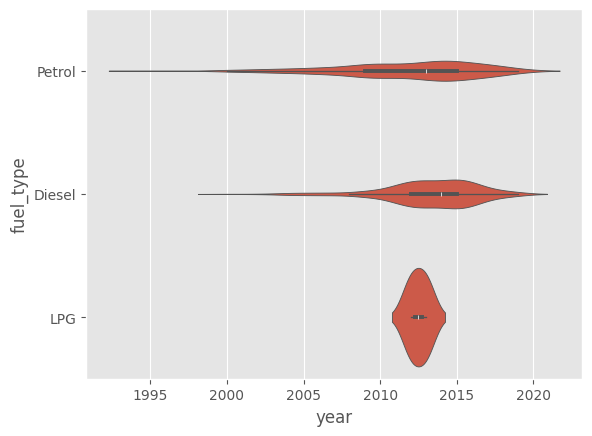

In [449]:
sns.violinplot(x='year',y='fuel_type',data=car)

## checking relationship of campany, fuel type , kms driven and price

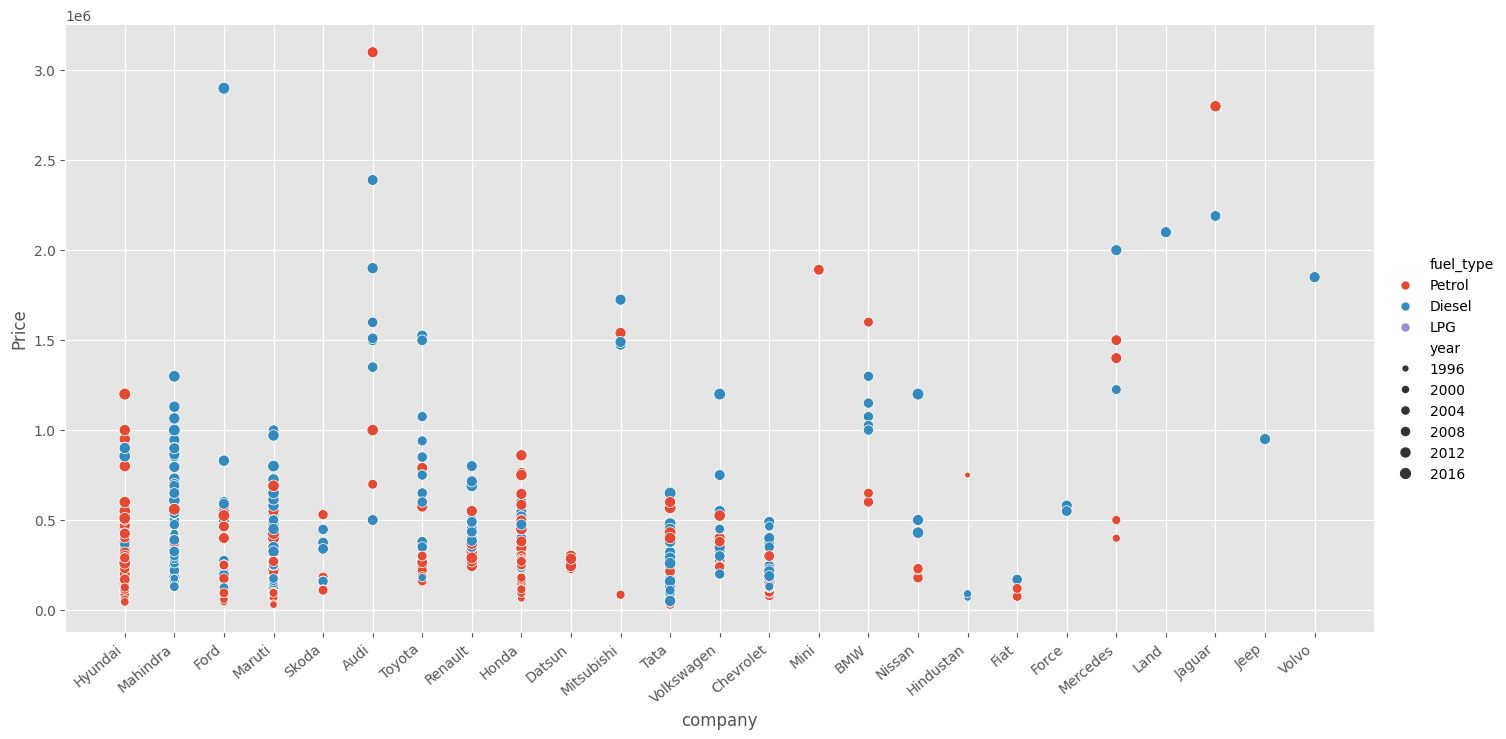

In [450]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [451]:
car['name'].unique()

array(['Hyundai Santro Xing', 'Mahindra Jeep CL550', 'Hyundai Grand i10',
       'Ford EcoSport Titanium', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente', 'Maruti Suzuki Alto',
       'Skoda Fabia Classic', 'Maruti Suzuki Stingray',
       'Hyundai Elite i20', 'Mahindra Scorpio SLE', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Hyundai i20 Sportz',
       'Maruti Suzuki Vitara', 'Mahindra Bolero DI',
       'Maruti Suzuki Swift', 'Maruti Suzuki Wagon', 'Toyota Innova 2.0',
       'Renault Lodgy 85', 'Skoda Yeti Ambition', 'Maruti Suzuki Baleno',
       'Renault Duster 110', 'Renault Duster 85', 'Honda City 1.5',
       'Maruti Suzuki Dzire', 'Honda Amaze', 'Honda Amaze 1.5',
       'Honda City', 'Datsun Redi GO', 'Maruti Suzuki SX4',
       'Mitsubishi Pajero Sport', 'Honda City ZX', 'Tata Indigo eCS',
       'Volkswagen Polo Highline', 'Chevrolet Spark LS',
       'Renault Duster 110PS', 'Mini Cooper S', 'Skoda Fabia 1.2L',
       'Renault Duster', 'Mahindra Scor

# extracting training data

In [452]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [453]:
X.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [454]:
y.shape

(815,)

## apply train test split

In [455]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [456]:
from sklearn.linear_model import LinearRegression

In [457]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### creating an one hotencoder to tarnsform all possibel categories

In [458]:
ohe=OneHotEncoder()
ohe.fit([['name','company','fuel_type']])

OneHotEncoder()


#### Creating an OneHotEncoder object to contain all the possible categories

In [459]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor


In [460]:

column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

## linear  regresssion model

In [461]:
lr=LinearRegression()

### making a  pipe line

In [462]:

pipe=make_pipeline(column_trans,lr)

In [463]:
# Categorical and numerical columns
categorical_features = ['name', 'company', 'fuel_type']
numerical_features = ['year', 'kms_driven']

# OneHotEncoder with handle_unknown
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Full Pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])


In [464]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name', 'company',
                                                   'fuel_type']),
                                                 ('num', StandardScaler(),
                                                  ['year', 'kms_driven'])])),
                ('model', RandomForestRegressor())])

In [465]:
car.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [466]:
y_pred=pipe.predict(x_test)

In [467]:
r2_score(y_test,y_pred)

0.7756502139985024

## 
Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [468]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_trans = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), ['name', 'company', 'fuel_type'])
], remainder='passthrough')


In [469]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [470]:

np.argmax(scores)

np.int64(302)

In [471]:

scores[np.argmax(scores)]

0.899115755487984

In [472]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430110.63569277])

## best model is found at a certain random state

In [473]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.899115755487984

In [474]:
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [475]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([456670.32722791])

In [476]:
pipe.steps[0][1].transformers[0][1].categories

'auto'